In [1]:
pip install numpy  

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn 


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np
import warnings
#Importa as biblitocas utilizadas

warnings.filterwarnings('ignore')
#Ignora todos os avisos

%matplotlib inline
#Função para gerar gráficos no próprio Jupyter Notebook

In [6]:
caminho_arquivo_csv = 'tabela_filtrada.csv'
tabela_filtrada = pd.read_csv(caminho_arquivo_csv)
#Faz a leitura da tabela csv

media_idade = tabela_filtrada['Age'].mean()
print(round(media_idade,2))
#Calculando a média dos atletas e printando

25.99


In [7]:
tabela_filtrada #Visualização da tabela

,Unnamed: 0,Entry ID,Name,Gender,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
0,3,3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,12,37,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,13,38,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,15,41,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
4,16,42,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41495,286078,270641,Sergey Mikhaylovich Zubov,Male,21.0,Unified Team,EUN,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
41496,286122,270827,Matja Zupan,Male,19.0,Yugoslavia,YUG,1988,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
41497,286154,270876,Pirmin Zurbriggen,Male,25.0,Switzerland,SUI,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Downhill,Gold
41498,286156,270878,Pirmin Zurbriggen,Male,25.0,Switzerland,SUI,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze


In [8]:
mediana_idade = tabela_filtrada['Age'].median()
print(round(mediana_idade,2))

#Calcula a mediana das idades dos atletas

25.0


In [9]:
moda_idade = tabela_filtrada['Age'].mode()
print(moda_idade)

#Calcula a moda da idade dos atletas

0    23.0
Name: Age, dtype: float64


In [10]:
dispercao_idades = tabela_filtrada['Age'].describe() 
print(round(dispercao_idades,2))
#Calcula o desvio padrão

count    41500.00
mean        25.99
std          5.88
min         10.00
25%         22.00
50%         25.00
75%         29.00
max         73.00
Name: Age, dtype: float64


In [11]:
tabela_filtrada["Team"].value_counts() 
#Filtra o ranking medalhas

Team
United States    5503
Soviet Union     2451
Germany          2051
Great Britain    1770
France           1661
                 ... 
Barbados            1
Scamasaxe-3         1
Scamasaxe-2         1
Brynhild-2          1
Guatemala           1
Name: count, Length: 489, dtype: int64

In [12]:
ouro = tabela_filtrada[tabela_filtrada['Medal'] == 'Gold'] #Total de ouro
ouro['Team'].value_counts()

Team
United States    2585
Soviet Union     1058
Germany           697
Italy             556
Great Britain     556
                 ... 
Costa Rica          1
Panama              1
Singapore           1
Syria               1
Tajikistan          1
Name: count, Length: 240, dtype: int64

In [13]:
ouro_brasil = tabela_filtrada[(tabela_filtrada['Medal'] == 'Gold') & (tabela_filtrada["Team"]== "Brazil")] 
ouro_brasil.shape[0]

#Calcula a quantidade de medalhas de ouro do Brasil 

132

In [14]:
total_medalhas_brasil = tabela_filtrada[tabela_filtrada["Team"] == "Brazil"].shape[0]
print(total_medalhas_brasil)

#Calcula o total de medalhas do Brasil

503


In [15]:
media_brasil = total_medalhas_brasil/32
print(round(media_brasil,2))

#Calcula a media de medalhas do Brasil

15.72


In [16]:
filtro_brasil = tabela_filtrada[tabela_filtrada['Team']=='Brazil']
media_idade_brasil = filtro_brasil['Age'].mean()
print(round(media_idade_brasil, 2))

#Calcula a media de idade das equipes do Brasil

25.66


<Axes: xlabel='Age'>

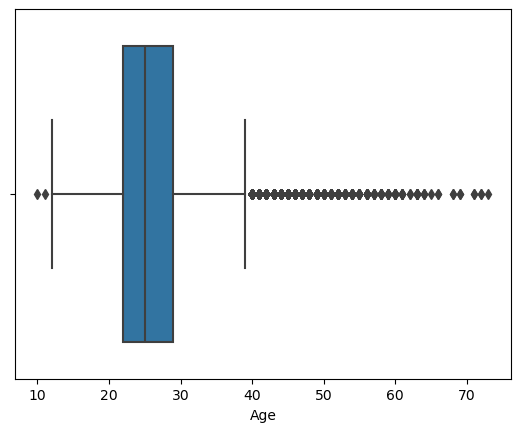

In [17]:
sns.boxplot(data = tabela_filtrada, x = "Age")

#Gera o gráfico de Boxplot da idade dos atletas

In [18]:
caminho_arquivo_regions = "all_regions.csv"

#Variavel para o arquivo csv de regiões

In [19]:
caminho_arquivo_athlete_games = "tabela_filtrada.csv"

#Variavel para o arquivo csv da tabela filtrada

In [20]:
df_regions = pd.read_csv(caminho_arquivo_regions)

#Leitura do variavel caminho_arquivo_regions

In [21]:
df_athlete_games = pd.read_csv(caminho_arquivo_athlete_games)
#Leitura da variavel caminho_arquivo_athlete_games

In [22]:
total_medalhas = df_athlete_games.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)
#Filtramos os valores da coluna de medalhas e atribuimos 0 aos valores vazios

total_medalhas['Total'] = total_medalhas.sum(axis=1)
#Total de medalhas de cada país pelas categorias ouro prata e bronze .


In [23]:
total_medalhas = total_medalhas[total_medalhas['Total'] > 0]
#Filtro para países que tenham pelo menos 1 medalha

In [24]:
ranking = total_medalhas.sort_values(by='Total', ascending=False)

#Organizamos o ranking pela quantidade de medalhas

In [25]:
top_32 = ranking.head(32)


#Filtramos os top 32 países mais vencedores

In [26]:
sns.set_palette("pastel") 

#Tons Pastéis para os gráfico

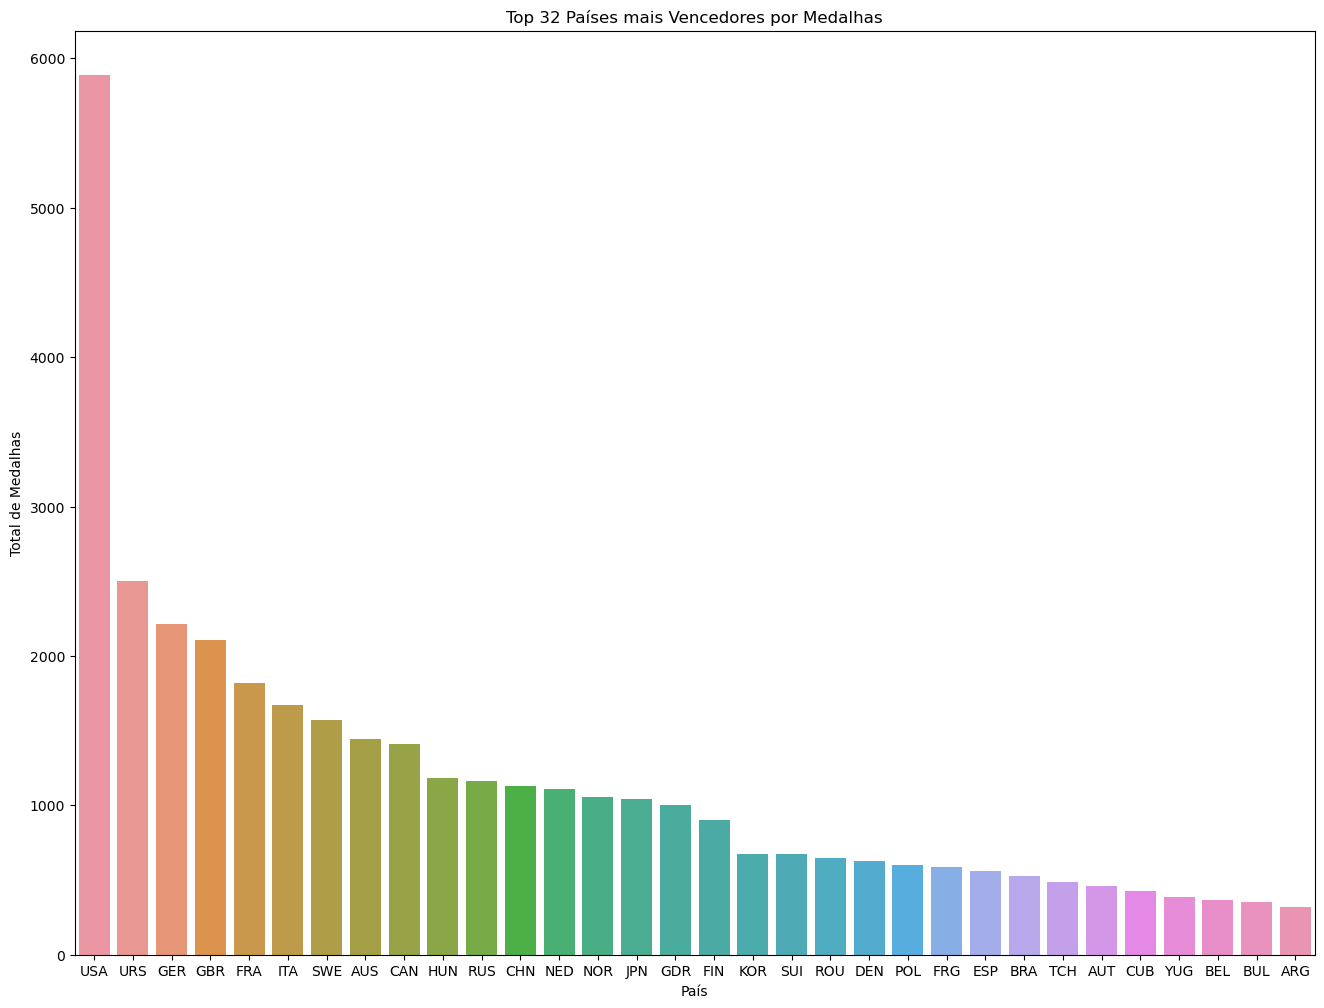

In [27]:
plt.figure(figsize=(16, 12))
sns.barplot(x=top_32.index, y='Total', data=top_32)
plt.ylabel('Total de Medalhas')
plt.xlabel('País')
plt.title('Top 32 Países mais Vencedores por Medalhas')
plt.show()

#Gráfico de Barra do top 32

In [28]:
mapeamento_medalhas = {'Nan': 0, 'Bronze': 1, 'silver': 2, 'Ouro': 3}
#Mapea as Medalhas

In [29]:
caminho_arquivo_all = 'all_athlete_games.csv'       
df_todos_atletas = pd.read_csv(caminho_arquivo_all)
#Faz leitura dos atletas

In [30]:
mapeamento_medalhas = {'Nenhuma': 1, 'Bronze': 2, 'Silver': 3, 'Gold': 4}
df_todos_atletas['Medalhas_numericas'] = np.where(df_todos_atletas['Medal'].notnull(), 1, 0) 
df_todos_atletas['Medalhas_numericas'] = df_todos_atletas['Medal'].map(mapeamento_medalhas)
#Filtra os atletas com medalha

In [31]:
df_todos_atletas = df_todos_atletas.dropna(subset=['Age']) #Retira atletas sem informação de idade
df_todos_atletas['Age'] = df_todos_atletas['Age'].astype(int) #Filtra idade de atletas

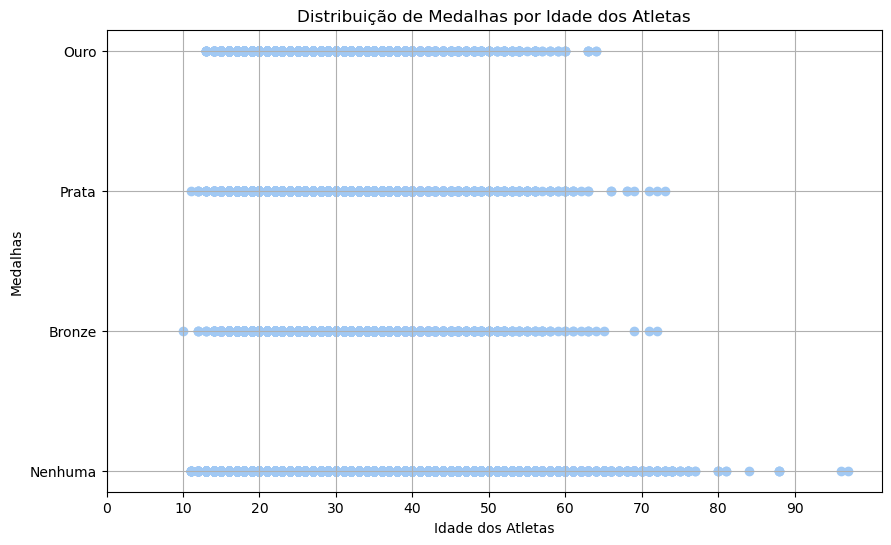

In [32]:
df_todos_atletas['Medalhas_numericas'].fillna(1, inplace=True) #vai substituir os Nan por 1


plt.figure(figsize=(10, 6)) 
plt.scatter(df_todos_atletas['Age'], df_todos_atletas['Medalhas_numericas'], alpha=1.0)
plt.xticks(ticks=range(0, df_todos_atletas['Age'].max(), 10))

plt.xlabel('Idade dos Atletas') 
plt.ylabel('Medalhas')
plt.title('Distribuição de Medalhas por Idade dos Atletas')
plt.yticks(ticks=[1, 2, 3, 4], labels=['Nenhuma', 'Bronze', 'Prata', 'Ouro'])
plt.grid(True)
plt.show()
#Gera gráfico de dispersão

In [33]:
df_ordenado = df_todos_atletas.sort_values(by='Age', ascending=False)

mais_velho = df_ordenado.iloc[0]
penultimo_mais_velho = df_ordenado.iloc[1]

#Filtra os atletas mais velhos a receberem medalha olímpica

#### Os dois atletas "mais velhos". Ambos nem estavam vivos quando participaram, pois os dois morreram em 1910, mas suas obras concorreram na olimpiadas, no esporte de competição de artes, e acabaram por contabilizar as suas idades a partir de quantos anos eles teriam quando suas obras ganharam


In [34]:
print("Penúltimo mais velho:")
print(penultimo_mais_velho)
print("\nMais velho:")
print(mais_velho)

#Apresenta os dados sobre os atletas mais velhos

Penúltimo mais velho:
Entry ID                                                       98118
Name                                                   Winslow Homer
Gender                                                          Male
Age                                                               96
Team                                                   United States
NOC                                                              USA
Year                                                            1932
Season                                                        Summer
City                                                     Los Angeles
Sport                                               Art Competitions
Event                 Art Competitions Mixed Painting, Unknown Event
Medal                                                            NaN
Medalhas_numericas                                               1.0
Name: 81200, dtype: object

Mais velho:
Entry ID                                 

In [35]:
contagem_cidades_por_ano = df_todos_atletas.groupby(['City', 'Year']).size()
contagem_cidades = contagem_cidades_por_ano.groupby('City').size()
top_10_cidades = contagem_cidades.nlargest(10)
cores = np.random.rand(len(top_10_cidades), 3)
#Filtra cidades pelo tamanho

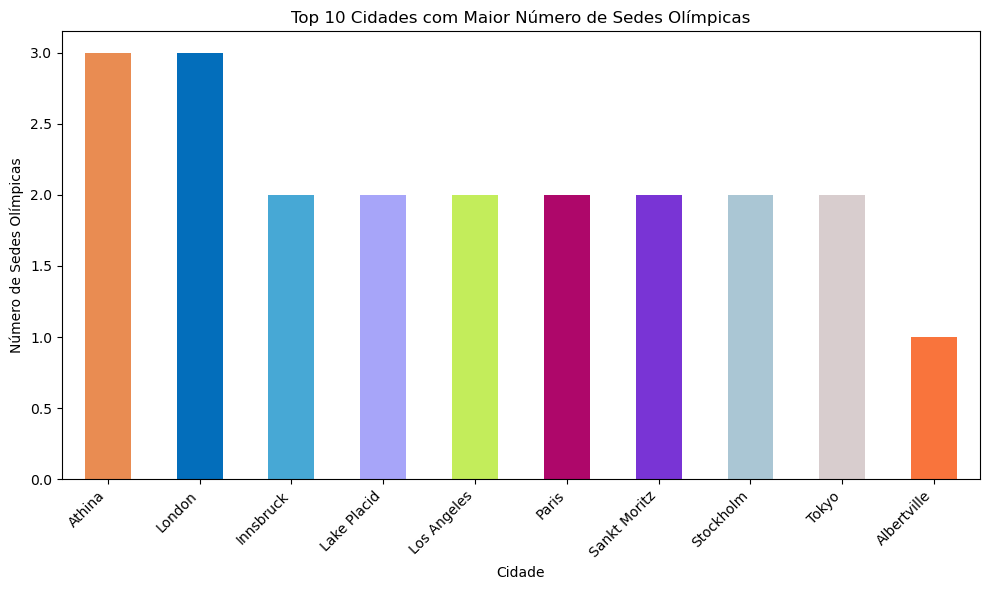

In [36]:

plt.figure(figsize=(10, 6))
top_10_cidades.plot(kind='bar', color=cores)
plt.xlabel('Cidade')
plt.ylabel('Número de Sedes Olímpicas')
plt.title('Top 10 Cidades com Maior Número de Sedes Olímpicas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Gera gráfico de Barra 

In [37]:
correlacao_idade_medalhas = df_todos_atletas['Age'].corr(df_todos_atletas['Medalhas_numericas'])
correlacao_idade_medalhas
#Faz a correlação das idades e medalhas

0.022501092012018727

In [38]:
df = pd.read_csv('tabela_filtrada_por_country.csv')

In [39]:
city_to_country = {
    'Beijing': 'China',
    'Tokyo': 'Japan',
    'Paris': 'France',
    'Los Angeles': 'United States',
    'London': 'United Kingdom',
    'Seoul': 'South Korea',
    'Rio de Janeiro': 'Brazil',
    'Athens': 'Greece',
    'Sydney': 'Australia',
    'Barcelona': 'Spain',
    'Atlanta': 'United States',
    'Moscow': 'Russia',
    'Montreal': 'Canada',
    'Munich': 'Germany',
    'Mexico City': 'Mexico',
    'Rome': 'Italy',
    'Melbourne': 'Australia',
    'Helsinki': 'Finland',
    'Stockholm': 'Sweden',
    'Antwerp': 'Belgium',
    'Amsterdam': 'Netherlands',
    'Berlin': 'Germany',
    'Oslo': 'Norway',
    'Cortina d\'Ampezzo': 'Italy',
    'Squaw Valley': 'United States',
    'Innsbruck': 'Austria',
    'Grenoble': 'France',
    'Sapporo': 'Japan',
    'Sarajevo': 'Bosnia and Herzegovina',
    'Calgary': 'Canada',
    'Albertville': 'France',
    'Lillehammer': 'Norway',
    'Nagano': 'Japan',
    'Salt Lake City': 'United States',
    'Turin': 'Italy',
    'Vancouver': 'Canada',
    'Sochi': 'Russia',
    'Pyeongchang': 'South Korea',
    'Chamonix': 'France',
    'St. Moritz': 'Switzerland',
    'Lake Placid': 'United States',
    'Garmisch-Partenkirchen': 'Germany',
    'Antwerpen': 'Belgium',
    'Athina': 'Greece',
    'Moskva': 'Russia',
    'Roma': 'Italy',
    'St. Louis': 'United States'
}
substituições = {
    'Great Britain': 'United Kingdom',
    'England': 'United Kingdom',
    'United Kingdom': 'United Kingdom'}

In [40]:
df['country'] = df['city'].map(city_to_country)
df['Team'].replace(substituições, inplace=True)

In [41]:
df.to_csv('tabela_filtrada_por_country.csv', index=False)

In [42]:
occurrences = df[df['Team'] == df['country']]

# Contar o número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos
count_represented_home_country = occurrences.shape[0]

# Exibir o resultado
print("Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos:", count_represented_home_country)

Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos: 5410


In [43]:
# Filtrar as ocorrências onde a coluna 'Team' é igual à coluna 'country'
occurrences = df[df['Team'] == df['country']]

# Contar as ocorrências para cada país
country_counts = occurrences['Team'].value_counts()

# Exibir os resultados
print("Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos, por país:")
print(country_counts)


Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos, por país:
Team
United States     1178
United Kingdom     984
France             882
Germany            435
Australia          301
Japan              209
Spain              207
Canada             187
Italy              170
China              170
Sweden             158
Netherlands        102
Belgium             95
South Korea         75
Russia              56
Norway              49
Greece              48
Brazil              46
Finland             35
Austria             14
Mexico               9
Name: count, dtype: int64


In [44]:
country_palette = sns.color_palette("hsv", len(country_counts))

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

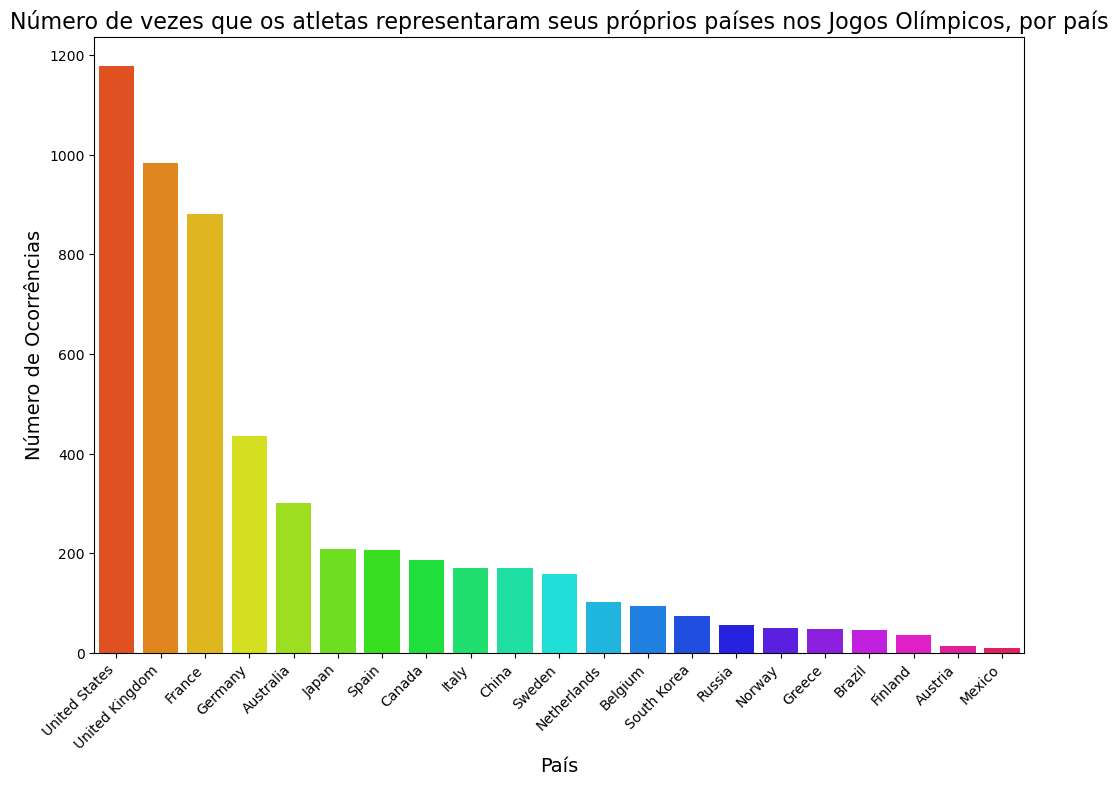

In [45]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=country_counts.index, y=country_counts.values, palette=country_palette)
plt.title('Número de vezes que os atletas representaram seus próprios países nos Jogos Olímpicos, por país', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Número de Ocorrências', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

In [46]:
cities_per_country = df.groupby('country')['city'].nunique()
cities_per_country = cities_per_country.sort_values(ascending=False)
print(cities_per_country)

country
United States             6
France                    4
Japan                     3
Canada                    3
Germany                   3
Russia                    2
Norway                    2
Australia                 2
Italy                     2
Finland                   1
China                     1
Greece                    1
Austria                   1
Brazil                    1
Mexico                    1
Netherlands               1
Bosnia and Herzegovina    1
Belgium                   1
South Korea               1
Spain                     1
Sweden                    1
United Kingdom            1
Name: city, dtype: int64


In [55]:
# Dados fornecidos
country_counts = {
    'United States': 1178,
    'United Kingdom': 984,
    'France': 882,
    'Germany': 435,
    'Australia': 301,
    'Japan': 209,
    'Spain': 207,
    'Canada': 187,
    'Italy': 170,
    'China': 170,
    'Sweden': 158,
    'Netherlands': 102,
    'Belgium': 95,
    'South Korea': 75,
    'Russia': 56,
    'Norway': 49,
    'Greece': 48,
    'Brazil': 46,
    'Finland': 35,
    'Austria': 14,
    'Mexico': 9
}

cities_per_country = {
    'United States': 6,
    'France': 4,
    'Japan': 3,
    'Canada': 3,
    'Germany': 3,
    'Russia': 2,
    'Norway': 2,
    'Australia': 2,
    'Italy': 2,
    'Finland': 1,
    'China': 1,
    'Greece': 1,
    'Austria': 1,
    'Brazil': 1,
    'Mexico': 1,
    'Netherlands': 1,
    'Bosnia and Herzegovina': 1,
    'Belgium': 1,
    'South Korea': 1,
    'Spain': 1,
    'Sweden': 1,
    'United Kingdom': 1
}

# Calculando a média de medalhas por país dividido pelo número de medalhas
medias = {}
for country, medals in country_counts.items():
    cidades = cities_per_country.get(country, 1)  # Se não houver cidade especificada, assuma 1
    media = medals / cidades
    medias[country] = media

# Calculando a média geral
media_geral = sum(medias.values()) / len(medias)

print("Médias por país:")
for country, media in medias.items():
    print(f"{country}: {media}")

print("\nMédia geral:", media_geral)


Médias por país:
United States: 196.33333333333334
United Kingdom: 984.0
France: 220.5
Germany: 145.0
Australia: 150.5
Japan: 69.66666666666667
Spain: 207.0
Canada: 62.333333333333336
Italy: 85.0
China: 170.0
Sweden: 158.0
Netherlands: 102.0
Belgium: 95.0
South Korea: 75.0
Russia: 28.0
Norway: 24.5
Greece: 48.0
Brazil: 46.0
Finland: 35.0
Austria: 14.0
Mexico: 9.0

Média geral: 139.27777777777777
